In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [82]:
file_path = '../input/breast-cancer-wisconsin-data/data.csv'
wisconsin_data = pd.read_csv(file_path)
wisconsin_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [83]:
label_encoder = preprocessing.LabelEncoder()
wisconsin_data['diagnosis'] = label_encoder.fit_transform(wisconsin_data['diagnosis'])
wisconsin_data['diagnosis'].unique()

array([1, 0])

As the diagnosis data is in a String format, we need to convert the two types into integers before any progress for our model to make predictions.
Here 1 is Malignant and 2 is Benign.

In [84]:
y = wisconsin_data.diagnosis
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 
            'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
X = wisconsin_data[features]
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [85]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model1 = DecisionTreeRegressor(random_state = 1)
model1.fit(train_X, train_y)
preds_1 = model1.predict(val_X)
print(accuracy_score(val_y, preds_1))

0.9230769230769231


Finding the accuracy of our decision tree model.

In [86]:
def get_error(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model2.fit(train_X, train_y)
    preds_2 = model2.predict(val_X)
    mae = mean_absolute_error(val_y, preds_2)
    return(mae)

Here we find the mean absolute error.

In [87]:
for max_leaf_nodes in [2, 5, 10, 15, 50, 500, 5000,]:
    error = get_error(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(error)

0.1747367090740585
0.1089584602390496
0.08723938682605466
0.09536046283034234
0.08391608391608392
0.08391608391608392
0.08391608391608392


In [88]:
model3 = RandomForestRegressor(random_state = 1)
model3.fit(train_X, train_y)
preds_3 = model3.predict(val_X)
print(mean_absolute_error(val_y, preds_3))

0.08972027972027974


In [92]:
model = LinearRegression()
model.fit(X, y)
importance = model.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.49001
Feature: 1, Score: 0.02197
Feature: 2, Score: -0.05497
Feature: 3, Score: -0.00095
Feature: 4, Score: 1.94086
Feature: 5, Score: 0.09726
Feature: 6, Score: 0.80977
Feature: 7, Score: 6.43101
Feature: 8, Score: 1.01190
Feature: 9, Score: -0.11929


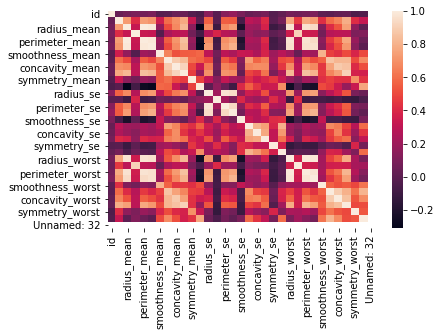

In [80]:
corr = wisconsin_data.corr()
sns.heatmap(corr)